In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd  /content/drive/'My Drive'/Data/

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/Data/'
/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import calendar

import warnings
warnings.filterwarnings("ignore")

Data

In [ ]:
#Data Source: https://covid19.who.int/data
covid_stats = pd.read_csv('/content/drive/MyDrive/Spring 2023/Independent Study/Proof_of_concept/covid_cases_who.csv')
covid_stats.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
#Data Source: https://zenodo.org/record/6676476#.ZBsY9y-B1QI
zdata = pd.read_csv('/content/drive/MyDrive/Spring 2023/Independent Study/Proof_of_concept/sars-ani-v1.1/sars_ani_data.csv')
zdata.head()

,ID,primary_source,archive_event_number,link_web,secondary_source,secondary_source_ID,secondary_source_web,host_com_orig,host_sci_orig,host_com_res,...,negative_sampling_type_2,reason_for_testing,symptoms,outcome,living_conditions,source_of_infection,variant,control_measures,original_source,link_original_source
0,20200229.7036661_1,ProMED,20200229.7036661,https://promedmail.org/promed-post/?id=7036661,WAHIS,IN_33455,https://wahis.oie.int/#/report-info?reportId=1...,dog,NS,dog,...,NaN,confirmed human case,subclinical,NS,pet,human,NaN,isolation,DailyMail UK,https://www.dailymail.co.uk/news/article-80534...
1,20200306.7057595_1,ProMED,20200306.7057595,https://promedmail.org/promed-post/?id=7057595,WAHIS,FUR_33546,https://wahis.oie.int/#/report-info?reportId=1...,dog,NS,dog,...,NaN,confirmed human case,subclinical,NS,pet,human,NaN,isolation,Caixin,https://www.caixinglobal.com/2020-03-05/a-hong...
2,20200312.7081842_1,ProMED,20200312.7081842,https://promedmail.org/promed-post/?id=7081842,WAHIS,FUR_33629,https://wahis.oie.int/#/report-info?reportId=1...,domestic dog,NS,dog,...,NaN,confirmed human case,subclinical,negative test,pet,human,NaN,isolation,Government of Hong Kong SAR,https://www.info.gov.hk/gia/general/202003/12/...
3,20200319.7112693_1,ProMED,20200319.7112693,https://promedmail.org/promed-post/?id=7112693,WAHIS,IN_33684,https://wahis.oie.int/#/report-info?reportId=1...,dog,NS,dog,...,NaN,confirmed human case,subclinical,NS,pet,human,NaN,isolation,Government of Hong Kong SAR,https://www.info.gov.hk/gia/general/202003/19/...
4,20200326.7146438_1,ProMED,20200326.7146438,https://promedmail.org/promed-post/?id=7146438,WAHIS,FUR_33762,https://wahis.oie.int/#/report-info?reportId=1...,dog,NS,dog,...,oral swab,confirmed human case,subclinical,death,pet,human,NaN,NaN,Government of Hong Kong SAR,https://www.info.gov.hk/gia/general/202003/26/...


In [ ]:
zdata[zdata.country_name == 'United States']['date_reported']

8      2020-04-06
10     2020-04-22
11     2020-04-22
12     2020-04-17
13     2020-04-17
          ...    
680    2022-04-04
681    2022-04-04
682    2022-04-04
683    2022-04-04
695    2022-06-07
Name: date_reported, Length: 277, dtype: object

In [ ]:
covid_stats[covid_stats.Country == 'China']['New_cases']

49308        0
49309        1
49310        0
49311        3
49312        0
         ...  
50477     9094
50478        0
50479    20120
50480     4868
50481        0
Name: New_cases, Length: 1174, dtype: int64

In [ ]:
zdata.country_name.unique()

array(['China', 'Belgium', 'United States', 'Netherlands', 'India',
       'France', 'Spain', 'Germany', 'Russian Federation', 'Denmark',
       'United Kingdom', 'South Africa', 'Japan', 'Chile', 'Italy',
       'Sweden', 'Brazil', 'Greece', 'Argentina', 'Lithuania', 'Poland',
       'Switzerland', 'Canada', 'Mexico', 'Slovenia', 'Republic of Korea',
       'Bosnia and Herzegovina', 'Latvia', 'Estonia', 'Croatia',
       'Thailand', 'Uruguay', 'Indonesia', 'Mongolia', 'Myanmar',
       'Singapore', 'Colombia', 'Finland', 'Ecuador'], dtype=object)

In [ ]:
covid_stats = covid_stats.replace({"Country": {'United States of America' : 'United States'}})
covid_stats.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

In [ ]:
zoonotic_stats = zdata[["country_name", "city", "host_com_orig ", "epidemiological_unit", "number_cases", "number_susceptible", "number_tested", "number_deaths", 
                              "date_confirmed", "date_reported", "reason_for_testing", "symptoms", "source_of_infection"]]
zoonotic_stats.head()

,country_name,city,host_com_orig,epidemiological_unit,number_cases,number_susceptible,number_tested,number_deaths,date_confirmed,date_reported,reason_for_testing,symptoms,source_of_infection
0,China,Hong Kong,dog,animal,1,1,1,0,2020-02-26,2020-02-29,confirmed human case,subclinical,human
1,China,Hong Kong,dog,animal,1,1,1,0,2020-02-26,2020-03-07,confirmed human case,subclinical,human
2,China,Hong Kong,domestic dog,animal,1,1,1,0,2020-02-26,2020-03-16,confirmed human case,subclinical,human
3,China,Hong Kong,dog,animal,1,2,2,0,NS,2020-03-20,confirmed human case,subclinical,human
4,China,Hong Kong,dog,animal,1,1,1,1,2020-02-26,2020-03-28,confirmed human case,subclinical,human


Analysis

In [ ]:
zoonotic_stats.country_name.unique()

array(['China', 'Belgium', 'United States', 'Netherlands', 'India',
       'France', 'Spain', 'Germany', 'Russian Federation', 'Denmark',
       'United Kingdom', 'South Africa', 'Japan', 'Chile', 'Italy',
       'Sweden', 'Brazil', 'Greece', 'Argentina', 'Lithuania', 'Poland',
       'Switzerland', 'Canada', 'Mexico', 'Slovenia', 'Republic of Korea',
       'Bosnia and Herzegovina', 'Latvia', 'Estonia', 'Croatia',
       'Thailand', 'Uruguay', 'Indonesia', 'Mongolia', 'Myanmar',
       'Singapore', 'Colombia', 'Finland', 'Ecuador'], dtype=object)

In [ ]:
covid_stats_reduced = covid_stats.loc[covid_stats['Country'].isin(zoonotic_stats.country_name.unique())]
covid_stats_reduced.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
9392,2020-01-03,AR,Argentina,AMRO,0,0,0,0
9393,2020-01-04,AR,Argentina,AMRO,0,0,0,0
9394,2020-01-05,AR,Argentina,AMRO,0,0,0,0
9395,2020-01-06,AR,Argentina,AMRO,0,0,0,0
9396,2020-01-07,AR,Argentina,AMRO,0,0,0,0


In [ ]:
cases = covid_stats_reduced[["Date_reported", "Country", "New_cases"]]

cases.Date_reported = pd.to_datetime(cases.Date_reported)
#cases.set_index('Date_reported', inplace=True)
tot_cases = cases.groupby('Country').resample('M', on='Date_reported').sum()
tot_cases.reset_index(inplace=True)
tot_cases['Month'] = pd.DatetimeIndex(tot_cases['Date_reported']).month
tot_cases['Month'] = tot_cases['Month'].apply(lambda x: calendar.month_abbr[x])
tot_cases = tot_cases.rename(columns={"New_cases": "Human_cases"})
tot_cases.head(15)

,Country,Date_reported,Human_cases,Month
0,Argentina,2020-01-31,0,Jan
1,Argentina,2020-02-29,0,Feb
2,Argentina,2020-03-31,1516,Mar
3,Argentina,2020-04-30,4792,Apr
4,Argentina,2020-05-31,16098,May
5,Argentina,2020-06-30,57013,Jun
6,Argentina,2020-07-31,142759,Jul
7,Argentina,2020-08-31,241296,Aug
8,Argentina,2020-09-30,339191,Sep
9,Argentina,2020-10-31,409334,Oct


In [ ]:
zcases = zoonotic_stats[["date_reported", "country_name", "number_cases"]] #changed date_reported to date_confirmed
zcases = zcases[zcases.date_reported != 'NS']
zcases.date_reported = pd.to_datetime(zcases.date_reported)
#dates = pd.to_datetime(zcases['date_reported'], errors='coerce')
#zcases = zcases[(dates.notnull())]
zcases = zcases[zcases.number_cases != 'NS']
zcases['number_cases'] = pd.to_numeric(zcases['number_cases'])
zcases = zcases[zcases.date_reported.isnull() == False]
tot_zcases = zcases.groupby('country_name').resample('M', on='date_reported').sum()
tot_zcases.reset_index(inplace=True)
tot_zcases = tot_zcases.rename(columns={"number_cases": "Animal_cases"})
tot_zcases.head(15)

,country_name,date_reported,Animal_cases
0,Argentina,2020-11-30,6
1,Argentina,2020-12-31,0
2,Argentina,2021-01-31,0
3,Argentina,2021-02-28,1
4,Argentina,2021-03-31,6
5,Argentina,2021-04-30,0
6,Argentina,2021-05-31,0
7,Argentina,2021-06-30,0
8,Argentina,2021-07-31,0
9,Argentina,2021-08-31,0


In [ ]:
#Data Fusion

country_year_dict = {}
count=0
cases_data = tot_cases.copy()
for row in cases_data.values:
  try:
    country_year_dict[row[0]].append(row[1])
  except:
    country_year_dict[row[0]] = [row[1]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:
    temp = tot_zcases[tot_zcases['country_name'] == country]
    if(len(temp[temp['date_reported'] == year]['Animal_cases'].values) > 0):
      final_data.append(temp[temp['date_reported'] == year]['Animal_cases'].values[0])
    else:
      final_data.append(-1)

cases_data['Animal_cases'] = final_data
cases_data = cases_data[cases_data.Animal_cases > -1]

#Normalize
cases_data['Human_normalized'] = cases_data.groupby('Country')['Human_cases'].transform(lambda x: (x / x.max()) * 10)
cases_data['Animal_normalized'] = cases_data.groupby('Country')['Animal_cases'].transform(lambda x: (x / x.max()) * 10)
#cases_data['Human_cases'] = (cases_data['Human_cases'] - cases_data['Human_cases'].mean()) / cases_data['Human_cases'].std()    
#cases_data['Animal_cases'] = (cases_data['Animal_cases'] - cases_data['Animal_cases'].mean()) / cases_data['Animal_cases'].std()    

cases_data.head()

,Country,Date_reported,Human_cases,Month,Animal_cases,Human_normalized,Animal_normalized
10,Argentina,2020-11-30,257432,Nov,6,0.963285,4.285714
11,Argentina,2020-12-31,204888,Dec,0,0.766671,0.000000
12,Argentina,2021-01-31,319233,Jan,0,1.194538,0.000000
13,Argentina,2021-02-28,189401,Feb,1,0.708720,0.714286
14,Argentina,2021-03-31,265418,Mar,6,0.993168,4.285714


In [ ]:
eliminate_list = ['Bosnia and Herzegovina','Brazil','Canada','Chile','Colombia','Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Greece', 'Indonesia', 'Italy','Latvia','Mexico', 'Myanmar','Poland',
       'Russian Federation', 'Singapore','South Africa','Sweden','Thailand','Uruguay']

cases_data = cases_data[~cases_data['Country'].isin(eliminate_list)]

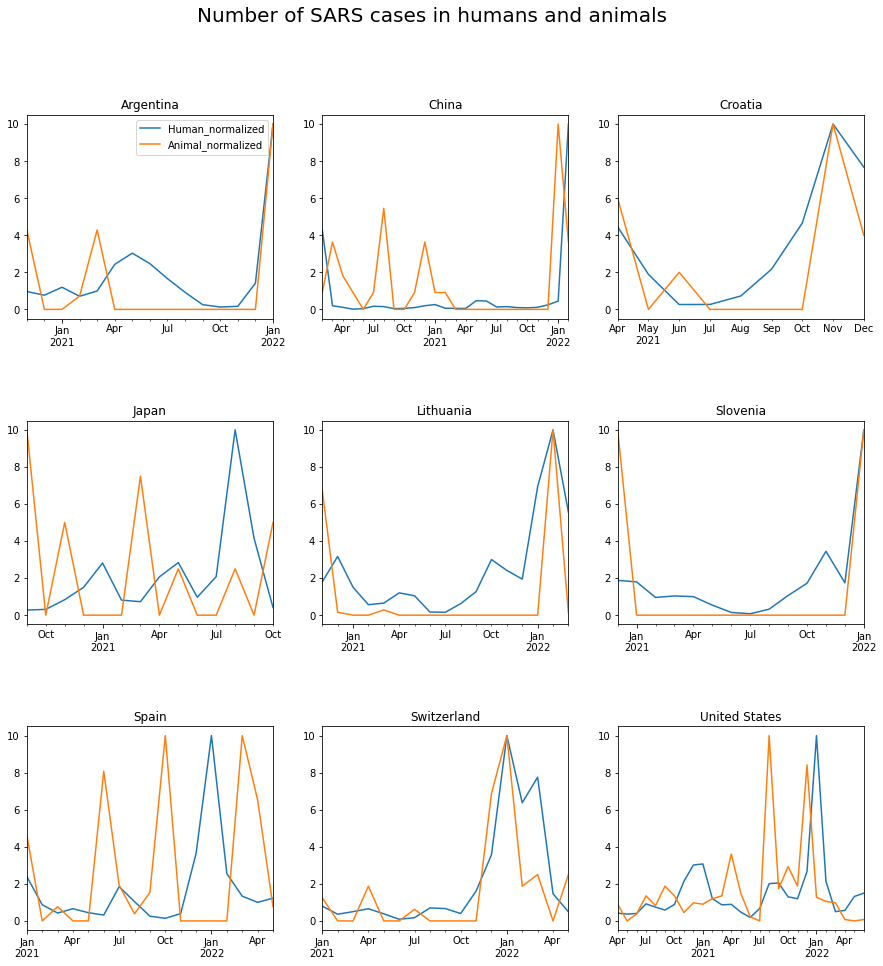

In [ ]:
#Date Reported in humans and animals
#cases_data = cases_data.drop(['Human_cases', 'Animal_cases'], axis=1)
countries = list(cases_data["Country"].unique())

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Number of SARS cases in humans and animals", fontsize=20)

count=0
for i, country in enumerate(countries):
    ax = plt.subplot(3, 3, i + 1)
    cases_data[cases_data["Country"] == country].plot(x="Date_reported", ax=ax)

    ax.set_title(country)
    if(count>0):
      ax.get_legend().remove()
    ax.set_xlabel("")
    #ax.set_xticks(np.arange(min(new_df['Date_reported'].values), max(new_df['Date_reported'].values)+2, 3))
    count+=1

plt.savefig('/content/sample_data/country_trend.png')

In [ ]:
#Augmented Dickey-Fuller test (Result: Both are stationary)

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in ['Human_normalized', 'Animal_normalized']:
  X = cases_data[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

ADF Statistic: -7.559205
p-value: 0.000000
-----------------------------
ADF Statistic: -7.568034
p-value: 0.000000
-----------------------------


In [ ]:
#cointegration test (Resut:Cointegrated)

import statsmodels.tsa.stattools as ts 

result=ts.coint(cases_data['Human_normalized'], cases_data['Animal_normalized'])
result

(-8.695681269896784,
 5.21207892839102e-13,
 array([-3.96896992, -3.37609367, -3.07210495]))

In [ ]:
#Granger Causality

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(cases_data[["Animal_normalized", 'Human_normalized']], maxlag=[1])
grangercausalitytests(cases_data[["Animal_normalized", 'Human_normalized']], maxlag=[2])
grangercausalitytests(cases_data[["Animal_normalized", 'Human_normalized']], maxlag=[3])
grangercausalitytests(cases_data[["Animal_normalized", 'Human_normalized']], maxlag=[4])
grangercausalitytests(cases_data[["Animal_normalized", 'Human_normalized']], maxlag=[5])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1609  , p=0.0142  , df_denom=151, df_num=1
ssr based chi2 test:   chi2=6.2833  , p=0.0122  , df=1
likelihood ratio test: chi2=6.1585  , p=0.0131  , df=1
parameter F test:         F=6.1609  , p=0.0142  , df_denom=151, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7842  , p=0.0097  , df_denom=148, df_num=2
ssr based chi2 test:   chi2=9.8916  , p=0.0071  , df=2
likelihood ratio test: chi2=9.5850  , p=0.0083  , df=2
parameter F test:         F=4.7842  , p=0.0097  , df_denom=148, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7852  , p=0.0033  , df_denom=145, df_num=3
ssr based chi2 test:   chi2=15.0486 , p=0.0018  , df=3
likelihood ratio test: chi2=14.3495 , p=0.0025  , df=3
parameter F test:         F=4.7852  , p=0.0033  , df_denom=145, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1753  , p=0.0032  

{5: ({'ssr_ftest': (3.359954158513066, 0.006763475388326416, 139.0, 5),
   'ssr_chi2test': (18.129249056725172, 0.0027887061495542823, 5),
   'lrtest': (17.11465937105072, 0.004287398197404493, 5),
   'params_ftest': (3.3599541585130615, 0.0067634753883265035, 139.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

Reddit Analysis

In [ ]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 8.0 MB/s eta 0:00:00


In [67]:
#Category: Symptoms

import praw
import datetime

# Specify the keyword to search for
keywords = ['COVID-19', 'fever', 'cough', 'breathing difficulty', 'body ache', 'loss of taste', 'loss of smell', 'congestion', 'common cold', 'anxiety']

# Search for posts
#symptomlist = []
#symp_count = []

for token in keywords:
  # Replace the following with your own client ID, client secret, and user agent
  reddit = praw.Reddit(client_id='l22RtDKkP7vsqGk2dZQJ3Q',
                      client_secret='oCxkqAq_J0QuV5FwozZXt-WJ_GylkA',
                      user_agent='pandemic_analytics')

  # Specify the subreddit to search
  subreddit = reddit.subreddit('CoronavirusUS')

  # Specify the date range to search
  start_date = datetime.datetime(2020, 12, 1)
  end_date = datetime.datetime(2020, 12, 31)


  posts = subreddit.search(token, limit=None)

  # Filter the posts by date range
  posts = [post for post in posts if start_date <= datetime.datetime.fromtimestamp(post.created_utc) <= end_date]

  # Print the titles of the filtered posts
  count=0
  for post in posts:
      symptomlist.append(["2020-12-31", token, post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
      count+=1
  symp_count.append(["2020-12-31", token,count])

#print(symptomlist)
#symptoms = pd.DataFrame(symptomlist, columns=["Date", "Token", "Title", "Score", "ID", "Subreddit","URL", "Num_comments", "Text", "Created"])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [79]:
#Category: Prevention

# Specify the keyword to search for
keywords = ['vaccine', 'sanitizer', 'RTPCR', 'N95', 'Cloth face mask']

# Search for posts
#preventlist = []
#prevent_count = []

for token in keywords:
  # Replace the following with your own client ID, client secret, and user agent
  reddit = praw.Reddit(client_id='l22RtDKkP7vsqGk2dZQJ3Q',
                      client_secret='oCxkqAq_J0QuV5FwozZXt-WJ_GylkA',
                      user_agent='pandemic_analytics')

  # Specify the subreddit to search
  subreddit = reddit.subreddit('CoronavirusUS')

  # Specify the date range to search
  start_date = datetime.datetime(2020, 12, 1)
  end_date = datetime.datetime(2020, 12, 31)


  posts = subreddit.search(token, limit=None)

  # Filter the posts by date range
  posts = [post for post in posts if start_date <= datetime.datetime.fromtimestamp(post.created_utc) <= end_date]

  # Print the titles of the filtered posts
  count=0
  for post in posts:
      preventlist.append(["2020-12-31", token, post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
      count+=1
  prevent_count.append(["2020-12-31", token,count])

#print(symptomlist)
#symptoms = pd.DataFrame(symptomlist, columns=["Date", "Token", "Title", "Score", "ID", "Subreddit","URL", "Num_comments", "Text", "Created"])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [105]:
#Category: Transmission

# Specify the keyword to search for
keywords = ['variants', 'quarantine']

# Search for posts
#translist = []
#trans_count = []

for token in keywords:
  # Replace the following with your own client ID, client secret, and user agent
  reddit = praw.Reddit(client_id='l22RtDKkP7vsqGk2dZQJ3Q',
                      client_secret='oCxkqAq_J0QuV5FwozZXt-WJ_GylkA',
                      user_agent='pandemic_analytics')

  # Specify the subreddit to search
  subreddit = reddit.subreddit('CoronavirusUS')

  # Specify the date range to search
  start_date = datetime.datetime(2020, 12, 1)
  end_date = datetime.datetime(2020, 12, 31)


  posts = subreddit.search(token, limit=None)

  # Filter the posts by date range
  posts = [post for post in posts if start_date <= datetime.datetime.fromtimestamp(post.created_utc) <= end_date]

  # Print the titles of the filtered posts
  count=0
  for post in posts:
      translist.append(["2020-12-31", token, post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
      count+=1
  trans_count.append(["2020-12-31", token,count])

#print(symptomlist)
#symptoms = pd.DataFrame(symptomlist, columns=["Date", "Token", "Title", "Score", "ID", "Subreddit","URL", "Num_comments", "Text", "Created"])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [117]:
#Category: Treatment

# Specify the keyword to search for
keywords = ['tylenol', 'cough suppressant', 'antibiotics', 'cough syrup']

# Search for posts
#tmtlist = []
#tmt_count = []

for token in keywords:
  # Replace the following with your own client ID, client secret, and user agent
  reddit = praw.Reddit(client_id='l22RtDKkP7vsqGk2dZQJ3Q',
                      client_secret='oCxkqAq_J0QuV5FwozZXt-WJ_GylkA',
                      user_agent='pandemic_analytics')

  # Specify the subreddit to search
  subreddit = reddit.subreddit('CoronavirusUS')

  # Specify the date range to search
  start_date = datetime.datetime(2020, 12, 1)
  end_date = datetime.datetime(2020, 12, 31)


  posts = subreddit.search(token, limit=None)

  # Filter the posts by date range
  posts = [post for post in posts if start_date <= datetime.datetime.fromtimestamp(post.created_utc) <= end_date]

  # Print the titles of the filtered posts
  count=0
  for post in posts:
      tmtlist.append(["2020-12-31", token, post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
      count+=1
  tmt_count.append(["2020-12-31", token,count])

#print(symptomlist)
#symptoms = pd.DataFrame(symptomlist, columns=["Date", "Token", "Title", "Score", "ID", "Subreddit","URL", "Num_comments", "Text", "Created"])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [129]:
#Category: Economy

# Specify the keyword to search for
keywords = ['unemployment fund', 'national emergency']

# Search for posts
#ecolist = []
#eco_count = []

for token in keywords:
  # Replace the following with your own client ID, client secret, and user agent
  reddit = praw.Reddit(client_id='l22RtDKkP7vsqGk2dZQJ3Q',
                      client_secret='oCxkqAq_J0QuV5FwozZXt-WJ_GylkA',
                      user_agent='pandemic_analytics')

  # Specify the subreddit to search
  subreddit = reddit.subreddit('CoronavirusUS')

  # Specify the date range to search
  start_date = datetime.datetime(2020, 12, 1)
  end_date = datetime.datetime(2020, 12, 31)


  posts = subreddit.search(token, limit=None)

  # Filter the posts by date range
  posts = [post for post in posts if start_date <= datetime.datetime.fromtimestamp(post.created_utc) <= end_date]

  # Print the titles of the filtered posts
  count=0
  for post in posts:
      ecolist.append(["2020-12-31", token, post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
      count+=1
  eco_count.append(["2020-12-31", token,count])

#print(symptomlist)
#symptoms = pd.DataFrame(symptomlist, columns=["Date", "Token", "Title", "Score", "ID", "Subreddit","URL", "Num_comments", "Text", "Created"])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Visualization

In [131]:
symptoms = pd.DataFrame(symp_count, columns=["Date", "Token", "Num_posts"])
symptoms.Date = pd.to_datetime(symptoms.Date)
symptoms.head()

,Date,Token,Num_posts
0,2020-02-29,COVID-19,0
1,2020-02-29,fever,4
2,2020-02-29,cough,2
3,2020-02-29,breathing difficulty,0
4,2020-02-29,body ache,1


In [135]:
us_cases = cases_data[cases_data.Country == 'United States']
us_cases.head()

,Country,Date_reported,Month,Human_normalized,Animal_normalized
1407,United States,2020-04-30,Apr,0.419258,0.902256
1408,United States,2020-05-31,May,0.369344,0.000000
1409,United States,2020-06-30,Jun,0.401663,0.375940
1410,United States,2020-07-31,Jul,0.921619,1.353383
1411,United States,2020-08-31,Aug,0.745686,0.827068


In [136]:
#symptoms

#Data Fusion
country_year_dict = {}
count=0

for row in symptoms.values:
  try:
    country_year_dict[row[1]].append(row[0])
  except:
    country_year_dict[row[1]] = [row[0]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:
    if(len(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values) > 0):
      final_data.append(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values[0])
    else:
      final_data.append(-1)

symptoms['covid_cases'] = final_data
symptoms = symptoms[symptoms.covid_cases > -1]

#Normalize
symptoms['Num_posts'] = symptoms.groupby('Token')['Num_posts'].transform(lambda x: (x / x.max()) * 10)   

symptoms.head()

,Date,Token,Num_posts,covid_cases
2,2020-02-29,cough,1.538462,0.419258
3,2020-02-29,breathing difficulty,0.000000,0.369344
4,2020-02-29,body ache,0.833333,0.401663
5,2020-02-29,loss of taste,0.000000,0.921619
6,2020-02-29,loss of smell,0.000000,0.745686


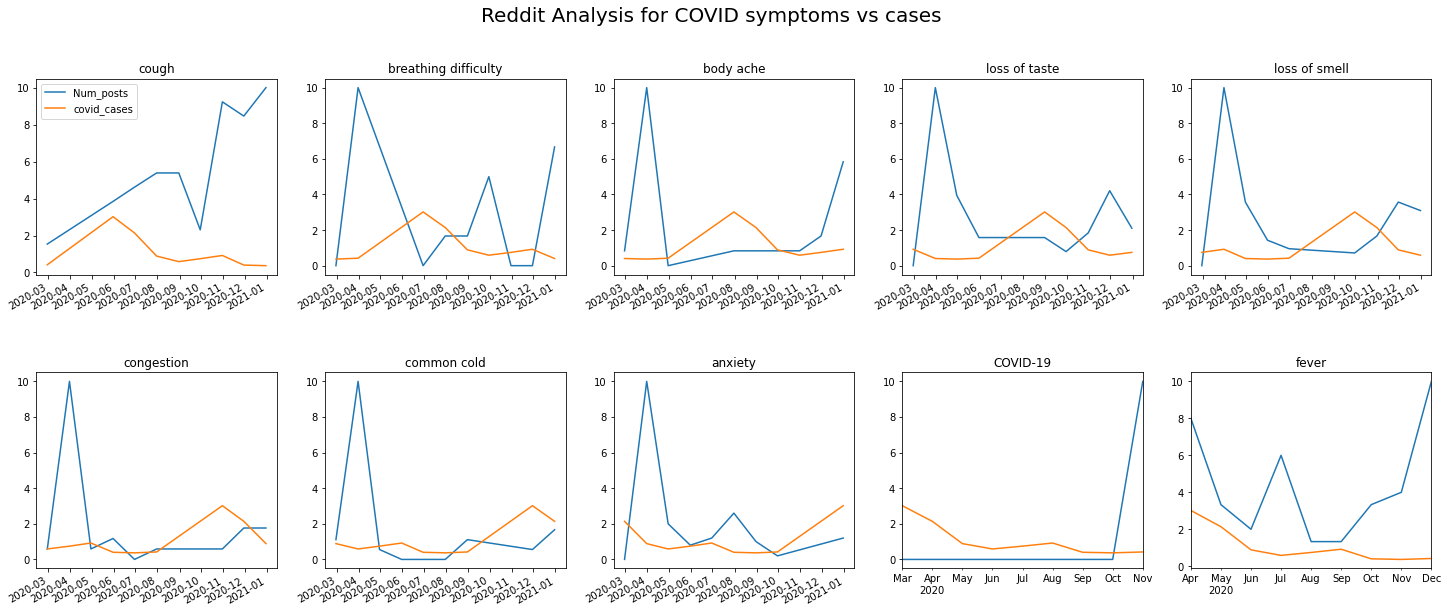

In [141]:
countries = list(symptoms["Token"].unique())

plt.figure(figsize=(25, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Reddit Analysis for COVID symptoms vs cases", fontsize=20)

count=0
for i, country in enumerate(countries):
    ax = plt.subplot(2, 5, i + 1)
    symptoms[symptoms["Token"] == country].plot(x="Date", ax=ax)

    ax.set_title(country)
    if(count>0):
      ax.get_legend().remove()
    ax.set_xlabel("")
    #ax.set_xticks(np.arange(min(new_df['Date_reported'].values), max(new_df['Date_reported'].values)+2, 3))
    count+=1

plt.savefig('/content/sample_data/reddit_symptom.png')

In [158]:
#Augmented Dickey-Fuller test

print("Augmented Dickey-Fuller test")

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in ['Num_posts', 'covid_cases']:
  X = symptoms[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

#cointegration test

print("cointegration test")

import statsmodels.tsa.stattools as ts 

result=ts.coint(symptoms['Num_posts'], symptoms['covid_cases'])
print(result)

#Granger Causality

print("Granger Causality")

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(symptoms[["Num_posts", 'covid_cases']], maxlag=[1])
grangercausalitytests(symptoms[["Num_posts", 'covid_cases']], maxlag=[2])
grangercausalitytests(symptoms[["Num_posts", 'covid_cases']], maxlag=[3])
grangercausalitytests(symptoms[["Num_posts", 'covid_cases']], maxlag=[4])
grangercausalitytests(symptoms[["Num_posts", 'covid_cases']], maxlag=[5])

print("Reverse Causality")

grangercausalitytests(symptoms[["covid_cases", 'Num_posts']], maxlag=[1])
grangercausalitytests(symptoms[["covid_cases", 'Num_posts']], maxlag=[2])
grangercausalitytests(symptoms[["covid_cases", 'Num_posts']], maxlag=[3])
grangercausalitytests(symptoms[["covid_cases", 'Num_posts']], maxlag=[4])
grangercausalitytests(symptoms[["covid_cases", 'Num_posts']], maxlag=[5])

Augmented Dickey-Fuller test
ADF Statistic: -3.970637
p-value: 0.001572
-----------------------------
ADF Statistic: -1719896699504085.000000
p-value: 0.000000
-----------------------------
cointegration test
(-3.848205924284094, 0.011676794189829545, array([-4.02372773, -3.40564419, -3.09244732]))
Granger Causality

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7180  , p=0.3992  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.7430  , p=0.3887  , df=1
likelihood ratio test: chi2=0.7399  , p=0.3897  , df=1
parameter F test:         F=0.7180  , p=0.3992  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2642  , p=0.2879  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=2.6807  , p=0.2618  , df=2
likelihood ratio test: chi2=2.6406  , p=0.2670  , df=2
parameter F test:         F=1.2642  , p=0.2879  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0216  

{5: ({'ssr_ftest': (0.6550192044937478, 0.6586040767523547, 74.0, 5),
   'ssr_chi2test': (3.7619346204032826, 0.5841747473556577, 5),
   'lrtest': (3.681064180734353, 0.5961844018191079, 5),
   'params_ftest': (0.6550192044937531, 0.658604076752352, 74.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

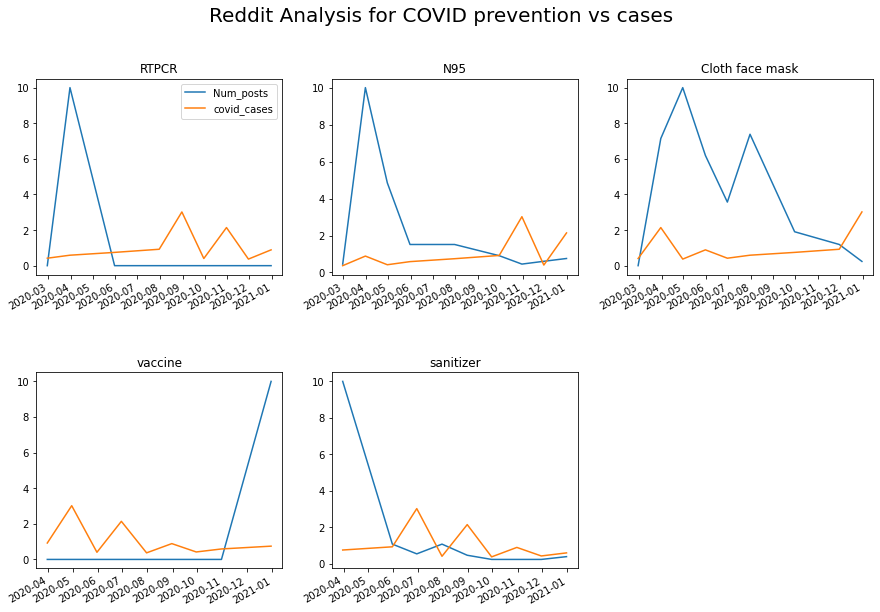

In [156]:
#Prevention

prevention = pd.DataFrame(prevent_count, columns=["Date", "Token", "Num_posts"])
prevention.Date = pd.to_datetime(prevention.Date)

#Data Fusion
country_year_dict = {}
count=0

for row in prevention.values:
  try:
    country_year_dict[row[1]].append(row[0])
  except:
    country_year_dict[row[1]] = [row[0]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:
    if(len(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values) > 0):
      final_data.append(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values[0])
    else:
      final_data.append(-1)

prevention['covid_cases'] = final_data
prevention = prevention[prevention.covid_cases > -1]

#Normalize
prevention['Num_posts'] = prevention.groupby('Token')['Num_posts'].transform(lambda x: (x / x.max()) * 10)   

countries = list(prevention["Token"].unique())

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Reddit Analysis for COVID prevention vs cases", fontsize=20)

count=0
for i, country in enumerate(countries):
    ax = plt.subplot(2, 3, i + 1)
    prevention[prevention["Token"] == country].plot(x="Date", ax=ax)

    ax.set_title(country)
    if(count>0):
      ax.get_legend().remove()
    ax.set_xlabel("")
    #ax.set_xticks(np.arange(min(new_df['Date_reported'].values), max(new_df['Date_reported'].values)+2, 3))
    count+=1

plt.savefig('/content/sample_data/reddit_prevention.png')

In [159]:
#Augmented Dickey-Fuller test

print("Augmented Dickey-Fuller test")

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in ['Num_posts', 'covid_cases']:
  X = prevention[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

#cointegration test

print("cointegration test")

import statsmodels.tsa.stattools as ts 

result=ts.coint(prevention['Num_posts'], prevention['covid_cases'])
print(result)

#Granger Causality

print("Granger Causality")

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(prevention[["Num_posts", 'covid_cases']], maxlag=[1])
grangercausalitytests(prevention[["Num_posts", 'covid_cases']], maxlag=[2])
grangercausalitytests(prevention[["Num_posts", 'covid_cases']], maxlag=[3])
grangercausalitytests(prevention[["Num_posts", 'covid_cases']], maxlag=[4])
grangercausalitytests(prevention[["Num_posts", 'covid_cases']], maxlag=[5])

print("Reverse Causality")

grangercausalitytests(prevention[["covid_cases", 'Num_posts']], maxlag=[1])
grangercausalitytests(prevention[["covid_cases", 'Num_posts']], maxlag=[2])
grangercausalitytests(prevention[["covid_cases", 'Num_posts']], maxlag=[3])
grangercausalitytests(prevention[["covid_cases", 'Num_posts']], maxlag=[4])
grangercausalitytests(prevention[["covid_cases", 'Num_posts']], maxlag=[5])

Augmented Dickey-Fuller test
ADF Statistic: -4.601420
p-value: 0.000128
-----------------------------
ADF Statistic: -2695843039549202.500000
p-value: 0.000000
-----------------------------
cointegration test
(-4.604672303914522, 0.0008198823319991033, array([-4.16266448, -3.47852019, -3.14224587]))
Granger Causality

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9852  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9846  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9846  , df=1
parameter F test:         F=0.0003  , p=0.9852  , df_denom=41, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0726  , p=0.9301  , df_denom=38, df_num=2
ssr based chi2 test:   chi2=0.1642  , p=0.9212  , df=2
likelihood ratio test: chi2=0.1639  , p=0.9213  , df=2
parameter F test:         F=0.0726  , p=0.9301  , df_denom=38, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6297 

{5: ({'ssr_ftest': (0.9754258698203689, 0.4492528892307768, 29.0, 5),
   'ssr_chi2test': (6.7270749642784065, 0.24174212241296067, 5),
   'lrtest': (6.217772250076891, 0.2856018133662465, 5),
   'params_ftest': (0.9754258698203788, 0.4492528892307712, 29.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [142]:
trans = pd.DataFrame(trans_count, columns=["Date", "Token", "Num_posts"])
trans.Date = pd.to_datetime(trans.Date)
trans.head()

,Date,Token,Num_posts
0,2020-02-29,variants,0
1,2020-02-29,quarantine,7
2,2020-03-31,variants,0
3,2020-03-31,quarantine,84
4,2020-04-30,variants,0


In [143]:
#Transmission

#Data Fusion
country_year_dict = {}
count=0

for row in trans.values:
  try:
    country_year_dict[row[1]].append(row[0])
  except:
    country_year_dict[row[1]] = [row[0]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:
    if(len(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values) > 0):
      final_data.append(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values[0])
    else:
      final_data.append(-1)

trans['covid_cases'] = final_data
trans = trans[trans.covid_cases > -1]

#Normalize
trans['Num_posts'] = trans.groupby('Token')['Num_posts'].transform(lambda x: (x / x.max()) * 10)   

trans.head()

,Date,Token,Num_posts,covid_cases
2,2020-03-31,variants,NaN,0.419258
3,2020-03-31,quarantine,10.000000,0.369344
4,2020-04-30,variants,NaN,0.401663
5,2020-04-30,quarantine,3.333333,0.921619
6,2020-05-31,variants,NaN,0.745686


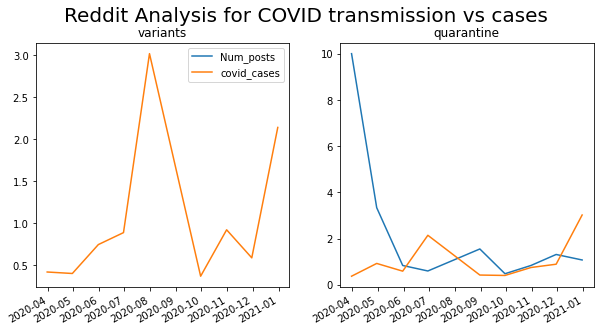

In [149]:
countries = list(trans["Token"].unique())

plt.figure(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Reddit Analysis for COVID transmission vs cases", fontsize=20)

count=0
for i, country in enumerate(countries):
    ax = plt.subplot(1, 2, i + 1)
    trans[trans["Token"] == country].plot(x="Date", ax=ax)

    ax.set_title(country)
    if(count>0):
      ax.get_legend().remove()
    ax.set_xlabel("")
    #ax.set_xticks(np.arange(min(new_df['Date_reported'].values), max(new_df['Date_reported'].values)+2, 3))
    count+=1

plt.savefig('/content/sample_data/reddit_trans.png')

In [162]:
#Augmented Dickey-Fuller test

print("Augmented Dickey-Fuller test")

trans = trans.dropna()

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in ['Num_posts', 'covid_cases']:
  X = trans[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

#cointegration test

print("cointegration test")

import statsmodels.tsa.stattools as ts 

result=ts.coint(trans['Num_posts'], trans['covid_cases'])
print(result)

#Granger Causality

print("Granger Causality")

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(trans[["Num_posts", 'covid_cases']], maxlag=[1])
grangercausalitytests(trans[["Num_posts", 'covid_cases']], maxlag=[2])

print("Reverse Causality")

grangercausalitytests(trans[["covid_cases", 'Num_posts']], maxlag=[1])
grangercausalitytests(trans[["covid_cases", 'Num_posts']], maxlag=[2])

Augmented Dickey-Fuller test
ADF Statistic: -4.722085
p-value: 0.000076
-----------------------------
ADF Statistic: -1.875807
p-value: 0.343526
-----------------------------
cointegration test
(-1.641761707663015, 0.7029452662139546, array([-5.78928688, -4.20650187, -3.6171    ]))
Granger Causality

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3076  , p=0.1892  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=3.6921  , p=0.0547  , df=1
likelihood ratio test: chi2=3.0358  , p=0.0814  , df=1
parameter F test:         F=2.3076  , p=0.1892  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.0851 , p=0.0293  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=231.5954, p=0.0000  , df=2
likelihood ratio test: chi2=24.7020 , p=0.0000  , df=2
parameter F test:         F=33.0851 , p=0.0293  , df_denom=2, df_num=2
Reverse Causality

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1754  , p

{2: ({'ssr_ftest': (0.05887355172254862, 0.944399827886177, 2.0, 2),
   'ssr_chi2test': (0.41211486205784037, 0.8137863383540971, 2),
   'lrtest': (0.4004395921227619, 0.8185508190582427, 2),
   'params_ftest': (0.05887355172254881, 0.944399827886177, 2.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

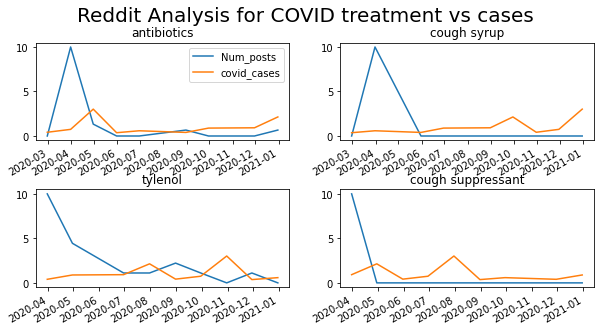

In [154]:
#Treatment

tmt = pd.DataFrame(tmt_count, columns=["Date", "Token", "Num_posts"])
tmt.Date = pd.to_datetime(tmt.Date)

#Data Fusion
country_year_dict = {}
count=0

for row in tmt.values:
  try:
    country_year_dict[row[1]].append(row[0])
  except:
    country_year_dict[row[1]] = [row[0]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:
    if(len(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values) > 0):
      final_data.append(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values[0])
    else:
      final_data.append(-1)

tmt['covid_cases'] = final_data
tmt = tmt[tmt.covid_cases > -1]

#Normalize
tmt['Num_posts'] = tmt.groupby('Token')['Num_posts'].transform(lambda x: (x / x.max()) * 10)   

countries = list(tmt["Token"].unique())

plt.figure(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Reddit Analysis for COVID treatment vs cases", fontsize=20)

count=0
for i, country in enumerate(countries):
    ax = plt.subplot(2, 2, i + 1)
    tmt[tmt["Token"] == country].plot(x="Date", ax=ax)

    ax.set_title(country)
    if(count>0):
      ax.get_legend().remove()
    ax.set_xlabel("")
    #ax.set_xticks(np.arange(min(new_df['Date_reported'].values), max(new_df['Date_reported'].values)+2, 3))
    count+=1

plt.savefig('/content/sample_data/reddit_treatment.png')

In [163]:
#Augmented Dickey-Fuller test

print("Augmented Dickey-Fuller test")

tmt = tmt.dropna()

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in ['Num_posts', 'covid_cases']:
  X = tmt[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

#cointegration test

print("cointegration test")

import statsmodels.tsa.stattools as ts 

result=ts.coint(tmt['Num_posts'], tmt['covid_cases'])
print(result)

#Granger Causality

print("Granger Causality")

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(tmt[["Num_posts", 'covid_cases']], maxlag=[1])
grangercausalitytests(tmt[["Num_posts", 'covid_cases']], maxlag=[2])
grangercausalitytests(tmt[["Num_posts", 'covid_cases']], maxlag=[3])
grangercausalitytests(tmt[["Num_posts", 'covid_cases']], maxlag=[4])
grangercausalitytests(tmt[["Num_posts", 'covid_cases']], maxlag=[5])

print("Reverse Causality")

grangercausalitytests(tmt[["covid_cases", 'Num_posts']], maxlag=[1])
grangercausalitytests(tmt[["covid_cases", 'Num_posts']], maxlag=[2])
grangercausalitytests(tmt[["covid_cases", 'Num_posts']], maxlag=[3])
grangercausalitytests(tmt[["covid_cases", 'Num_posts']], maxlag=[4])
grangercausalitytests(tmt[["covid_cases", 'Num_posts']], maxlag=[5])

Augmented Dickey-Fuller test
ADF Statistic: -2.177414
p-value: 0.214545
-----------------------------
ADF Statistic: -1175544860456421.000000
p-value: 0.000000
-----------------------------
cointegration test
(-4.580576240192996, 0.0009000457965646113, array([-4.23672041, -3.51627408, -3.16784755]))
Granger Causality

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1875  , p=0.6679  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=0.2050  , p=0.6507  , df=1
likelihood ratio test: chi2=0.2044  , p=0.6512  , df=1
parameter F test:         F=0.1875  , p=0.6679  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2924  , p=0.7487  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=0.6856  , p=0.7098  , df=2
likelihood ratio test: chi2=0.6788  , p=0.7122  , df=2
parameter F test:         F=0.2924  , p=0.7487  , df_denom=29, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3235 

{5: ({'ssr_ftest': (0.3007481324771071, 0.9066341676170793, 20.0, 5),
   'ssr_chi2test': (2.33079802669758, 0.8017330576168449, 5),
   'lrtest': (2.247333553036569, 0.8139702141037837, 5),
   'params_ftest': (0.30074813247709603, 0.9066341676170863, 20.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

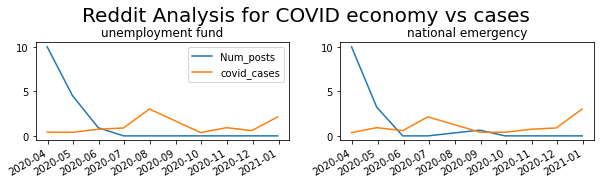

In [153]:
#Economy

economy = pd.DataFrame(eco_count, columns=["Date", "Token", "Num_posts"])
economy.Date = pd.to_datetime(economy.Date)

#Data Fusion
country_year_dict = {}
count=0

for row in economy.values:
  try:
    country_year_dict[row[1]].append(row[0])
  except:
    country_year_dict[row[1]] = [row[0]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:
    if(len(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values) > 0):
      final_data.append(us_cases[us_cases['Date_reported'] == year]['Human_normalized'].values[0])
    else:
      final_data.append(-1)

economy['covid_cases'] = final_data
economy = economy[economy.covid_cases > -1]

#Normalize
economy['Num_posts'] = economy.groupby('Token')['Num_posts'].transform(lambda x: (x / x.max()) * 10)   

countries = list(economy["Token"].unique())

plt.figure(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Reddit Analysis for COVID economy vs cases", fontsize=20)

count=0
for i, country in enumerate(countries):
    ax = plt.subplot(2, 2, i + 1)
    economy[economy["Token"] == country].plot(x="Date", ax=ax)

    ax.set_title(country)
    if(count>0):
      ax.get_legend().remove()
    ax.set_xlabel("")
    #ax.set_xticks(np.arange(min(new_df['Date_reported'].values), max(new_df['Date_reported'].values)+2, 3))
    count+=1

plt.savefig('/content/sample_data/reddit_economy.png')

In [164]:
#Augmented Dickey-Fuller test

print("Augmented Dickey-Fuller test")

economy = economy.dropna()

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in ['Num_posts', 'covid_cases']:
  X = economy[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

#cointegration test

print("cointegration test")

import statsmodels.tsa.stattools as ts 

result=ts.coint(economy['Num_posts'], economy['covid_cases'])
print(result)

#Granger Causality

print("Granger Causality")

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(economy[["Num_posts", 'covid_cases']], maxlag=[1])
grangercausalitytests(economy[["Num_posts", 'covid_cases']], maxlag=[2])
grangercausalitytests(economy[["Num_posts", 'covid_cases']], maxlag=[3])
grangercausalitytests(economy[["Num_posts", 'covid_cases']], maxlag=[4])
grangercausalitytests(economy[["Num_posts", 'covid_cases']], maxlag=[5])

print("Reverse Causality")

grangercausalitytests(economy[["covid_cases", 'Num_posts']], maxlag=[1])
grangercausalitytests(economy[["covid_cases", 'Num_posts']], maxlag=[2])
grangercausalitytests(economy[["covid_cases", 'Num_posts']], maxlag=[3])
grangercausalitytests(economy[["covid_cases", 'Num_posts']], maxlag=[4])
grangercausalitytests(economy[["covid_cases", 'Num_posts']], maxlag=[5])

Augmented Dickey-Fuller test
ADF Statistic: -2.584090
p-value: 0.096330
-----------------------------
ADF Statistic: -19390016410522.355469
p-value: 0.000000
-----------------------------
cointegration test
(-0.0, 0.9859002580259643, array([-4.65667979, -3.71915664, -3.30334412]))
Granger Causality

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2925  , p=0.5971  , df_denom=14, df_num=1
ssr based chi2 test:   chi2=0.3552  , p=0.5512  , df=1
likelihood ratio test: chi2=0.3515  , p=0.5533  , df=1
parameter F test:         F=0.2925  , p=0.5971  , df_denom=14, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1008  , p=0.3666  , df_denom=11, df_num=2
ssr based chi2 test:   chi2=3.2024  , p=0.2017  , df=2
likelihood ratio test: chi2=2.9191  , p=0.2323  , df=2
parameter F test:         F=1.1008  , p=0.3666  , df_denom=11, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9487  , p=0.4617  , df_d

{5: ({'ssr_ftest': (32.930673515956826, 0.0297328918749478, 2.0, 5),
   'ssr_chi2test': (1070.246889268597, 3.7076815320235414e-229, 5),
   'lrtest': (57.495994809358166, 3.996095024737967e-11, 5),
   'params_ftest': (32.93067351595683, 0.02973289187494779, 2.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}